In [14]:
%matplotlib inline

In [15]:
import re

import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sbs

import gradienttool.gradienttool as gt
import shared.filehandling as sfh

In [16]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield 
    np.set_printoptions(**original)

In [17]:
def normaliseArray(x):
    mn = np.nanmin(x)
    mx = np.nanmax(x)
    return (x - mn) / (mx - mn)

In [18]:
inp = sfh.readCsvNamedMatrix(open("gradienttool/testdata/demData.csv"))

# strip out TP from column names, convert to array and normalise so time runs from $0…1$
t = [re.sub("^TP","",x) for x in inp.colnames]
t = normaliseArray(np.asarray(t, dtype=np.float64))

# "time prime" the times we want to predict significant gradients
tp = np.unique(t)

# need some way of getting back to non-normalised times!

In [19]:
# which row of data are we working with
index = 0

In [20]:
g = gt.GradientTool(t, inp.data[index,:])
g.setPriorRbfLengthscale(2.0, 0.2)
g.setPriorRbfVariance(2.0, 0.5)
g.setPriorNoiseVariance(1.5, 0.1)
g.optimize()

[[  0.     0.02   0.06   6.66   1.64  -5.21]
 [  0.05   0.33   0.06   6.26   0.8   -7.01]
 [  0.1    0.6    0.06   5.34   0.36  -8.85]
 [  0.14   0.83   0.06   3.96   0.2   -8.82]
 [  0.19   0.98   0.06   2.23   0.17  -5.42]
 [  0.24   1.04   0.06   0.31   0.17  -0.74]
 [  0.29   1.01   0.06  -1.64   0.16   4.06]
 [  0.33   0.88   0.06  -3.43   0.15   8.92]
 [  0.38   0.68   0.06  -4.88   0.14  13.23]
 [  0.43   0.43   0.06  -5.87   0.13  16.02]
 [  0.48   0.13   0.06  -6.29   0.14  17.05]
 [  0.52  -0.16   0.06  -6.13   0.14  16.59]
 [  0.57  -0.44   0.06  -5.39   0.13  14.72]
 [  0.62  -0.67   0.06  -4.17   0.14  11.31]
 [  0.67  -0.83   0.06  -2.6    0.15   6.78]
 [  0.71  -0.91   0.06  -0.85   0.16   2.1 ]
 [  0.76  -0.91   0.06   0.92   0.17  -2.23]
 [  0.81  -0.83   0.06   2.53   0.17  -6.13]
 [  0.86  -0.68   0.06   3.83   0.2   -8.52]
 [  0.9   -0.47   0.06   4.72   0.36  -7.81]
 [  0.95  -0.24   0.06   5.14   0.8   -5.76]
 [  1.     0.01   0.06   5.11   1.64  -4.  ]]


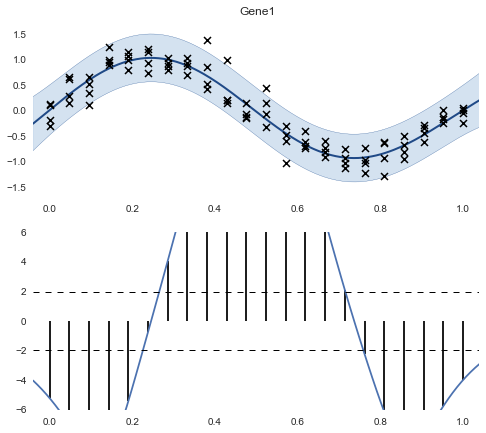

In [21]:
g.plot(inp.rownames[index],mpl.figure(figsize=(8,7)))

with printoptions(precision=2, edgeitems=8, suppress=True):
   print(g.getResults())